In [ ]:
import pandas as pd
import numpy as np

# WorldBank

## Tourism

In [ ]:
!wget http://api.worldbank.org/v2/en/indicator/ST.INT.ARVL?downloadformat=csv

--2020-12-13 19:26:00--  http://api.worldbank.org/v2/en/indicator/ST.INT.ARVL?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.188.72.121
Connecting to api.worldbank.org (api.worldbank.org)|52.188.72.121|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34281 (33K) [application/zip]
Saving to: ‘ST.INT.ARVL?downloadformat=csv’

ST.INT.ARVL?downloa 100%[===================>]  33.48K  --.-KB/s    in 0.03s   

2020-12-13 19:26:01 (1.11 MB/s) - ‘ST.INT.ARVL?downloadformat=csv’ saved [34281/34281]



In [ ]:
!unzip ST.INT.ARVL?downloadformat=csv

Archive:  ST.INT.ARVL?downloadformat=csv
  inflating: Metadata_Indicator_API_ST.INT.ARVL_DS2_en_csv_v2_1740745.csv  
  inflating: API_ST.INT.ARVL_DS2_en_csv_v2_1740745.csv  
  inflating: Metadata_Country_API_ST.INT.ARVL_DS2_en_csv_v2_1740745.csv  


In [ ]:
data1 = pd.read_csv("/content/Metadata_Country_API_ST.INT.ARVL_DS2_en_csv_v2_1740745.csv")

In [ ]:
data1.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN


In [ ]:
data2 = pd.read_csv("/content/Metadata_Indicator_API_ST.INT.ARVL_DS2_en_csv_v2_1740745.csv")

In [ ]:
data2.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,ST.INT.ARVL,"International tourism, number of arrivals",International inbound tourists (overnight visi...,"World Tourism Organization, Yearbook of Touris...",NaN


In [ ]:
data3 = pd.read_csv("/content/API_ST.INT.ARVL_DS2_en_csv_v2_1740745.csv",skiprows=4)

In [ ]:
data3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,619000.0,641000.0,650000.0,647000.0,683000.0,721000.0,691000.0,643000.0,642000.0,728000.0,733000.0,694000.0,772000.0,827000.0,813000.0,824000.0,869000.0,904000.0,979000.0,1072000.0,1225000.0,1102000.0,1070500.0,1082000.0,NaN,NaN,NaN
1,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.0,21000.0,45000.0,52000.0,45000.0,51000.0,67000.0,91000.0,107000.0,194000.0,210000.0,121000.0,195000.0,294000.0,366000.0,425000.0,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0,261000.0,218000.0,NaN,NaN,NaN
3,Albania,ALB,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1062000.0,1247000.0,1711000.0,2191000.0,2469000.0,3156000.0,2857000.0,3341000.0,3784000.0,4070000.0,4643000.0,5340000.0,NaN,NaN,NaN
4,Andorra,AND,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2347000.0,2949000.0,3516000.0,3387000.0,3138000.0,2791000.0,2418000.0,2227000.0,2189000.0,2059000.0,1830000.0,1808000.0,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2819000.0,3003000.0,3042000.0,NaN,NaN,NaN


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [ ]:
data3.drop(["Unnamed: 65","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994"], axis = 1,inplace=True)
data3.fillna(0,inplace= True)

In [ ]:
data3["TouristMean"] = data3.mean(numeric_only=True, axis=1)

In [ ]:
data3["TouristMean"] = data3["TouristMean"].astype(np.uint64)

In [ ]:
data3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,TouristMean
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,619000.0,641000.0,650000.0,647000.0,683000.0,721000.0,691000.0,643000.0,642000.0,728000.0,733000.0,694000.0,772000.0,827000.0,813000.0,824000.0,869000.0,904000.0,979000.0,1072000.0,1225000.0,1102000.0,1070500.0,1082000.0,0.0,0.0,755057
1,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,9000.0,21000.0,45000.0,52000.0,45000.0,51000.0,67000.0,91000.0,107000.0,194000.0,210000.0,121000.0,195000.0,294000.0,366000.0,425000.0,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0,261000.0,218000.0,0.0,0.0,231346
3,Albania,ALB,"International tourism, number of arrivals",ST.INT.ARVL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1062000.0,1247000.0,1711000.0,2191000.0,2469000.0,3156000.0,2857000.0,3341000.0,3784000.0,4070000.0,4643000.0,5340000.0,0.0,0.0,1379653
4,Andorra,AND,"International tourism, number of arrivals",ST.INT.ARVL,0.0,0.0,0.0,0.0,2347000.0,2949000.0,3516000.0,3387000.0,3138000.0,2791000.0,2418000.0,2227000.0,2189000.0,2059000.0,1830000.0,1808000.0,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2819000.0,3003000.0,3042000.0,0.0,0.0,1975269


In [ ]:
data3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       'TouristMean'],
      dtype='object')

In [ ]:
touristData = data3[["Country Name","Country Code","TouristMean"]]

In [ ]:
touristData.rename(columns={"TouristMean":"TouristMean_1990_2020"},inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
touristData.head()

,Country Name,Country Code,TouristMean_1990_2020
0,Aruba,ABW,755057
1,Afghanistan,AFG,0
2,Angola,AGO,231346
3,Albania,ALB,1379653
4,Andorra,AND,1975269


In [ ]:
touristData.to_csv("touristData.csv",index=False)

## Terrestial and Marine Protected Areas

In [ ]:
!wget http://api.worldbank.org/v2/en/indicator/ER.PTD.TOTL.ZS?downloadformat=csv

--2020-12-14 17:44:35--  http://api.worldbank.org/v2/en/indicator/ER.PTD.TOTL.ZS?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.188.72.121
Connecting to api.worldbank.org (api.worldbank.org)|52.188.72.121|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17592 (17K) [application/zip]
Saving to: ‘ER.PTD.TOTL.ZS?downloadformat=csv’

ER.PTD.TOTL.ZS?down 100%[===================>]  17.18K  --.-KB/s    in 0.07s   

2020-12-14 17:44:36 (258 KB/s) - ‘ER.PTD.TOTL.ZS?downloadformat=csv’ saved [17592/17592]



In [ ]:
!unzip /content/ER.PTD.TOTL.ZS?downloadformat=csv

Archive:  /content/ER.PTD.TOTL.ZS?downloadformat=csv
  inflating: Metadata_Indicator_API_ER.PTD.TOTL.ZS_DS2_en_csv_v2_1745046.csv  
  inflating: API_ER.PTD.TOTL.ZS_DS2_en_csv_v2_1745046.csv  
  inflating: Metadata_Country_API_ER.PTD.TOTL.ZS_DS2_en_csv_v2_1745046.csv  


In [ ]:
terraData = pd.read_csv("/content/API_ER.PTD.TOTL.ZS_DS2_en_csv_v2_1745046.csv",skiprows=4)

In [ ]:
terraData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Terrestrial and marine protected areas (% of t...,ER.PTD.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.527983,0.141163,0.141163,NaN,NaN,NaN
1,Afghanistan,AFG,Terrestrial and marine protected areas (% of t...,ER.PTD.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.104707,0.104707,0.104707,NaN,NaN,NaN
2,Angola,AGO,Terrestrial and marine protected areas (% of t...,ER.PTD.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.004713,5.004711,5.004711,NaN,NaN,NaN
3,Albania,ALB,Terrestrial and marine protected areas (% of t...,ER.PTD.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.147749,13.525683,13.525683,NaN,NaN,NaN
4,Andorra,AND,Terrestrial and marine protected areas (% of t...,ER.PTD.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.190930,26.727725,26.727725,NaN,NaN,NaN


In [ ]:
drops = np.concatenate([terraData.columns[2:60],terraData.columns[-3:]])

In [ ]:
terraData.drop(drops,axis=1,inplace=True)

In [ ]:
terraData.head()

,Country Name,Country Code,2016,2017,2018
0,Aruba,ABW,0.527983,0.141163,0.141163
1,Afghanistan,AFG,0.104707,0.104707,0.104707
2,Angola,AGO,5.004713,5.004711,5.004711
3,Albania,ALB,13.147749,13.525683,13.525683
4,Andorra,AND,21.190930,26.727725,26.727725


In [ ]:
terraData.fillna(0,inplace=True)
terraData["TerraMarineProtected_2016_2018"] = terraData.mean(numeric_only=True, axis=1)
terraData["TerraMarineProtected_2016_2018"] = terraData["TerraMarineProtected_2016_2018"].astype(np.float64)

In [ ]:
terraData = terraData[["Country Name","Country Code","TerraMarineProtected_2016_2018"]]

In [ ]:
terraData.head()

,Country Name,Country Code,TerraMarineProtected_2016_2018
0,Aruba,ABW,0.270103
1,Afghanistan,AFG,0.104707
2,Angola,AGO,5.004712
3,Albania,ALB,13.399705
4,Andorra,AND,24.882127


In [ ]:
terraData.to_csv("protectedMarinesData.csv",index = False)

## Net Migration

In [ ]:
!wget http://api.worldbank.org/v2/en/indicator/SM.POP.NETM?downloadformat=csv

--2021-01-10 13:33:03--  http://api.worldbank.org/v2/en/indicator/SM.POP.NETM?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.188.72.121
Connecting to api.worldbank.org (api.worldbank.org)|52.188.72.121|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22648 (22K) [application/zip]
Saving to: ‘SM.POP.NETM?downloadformat=csv’

SM.POP.NETM?downloa 100%[===================>]  22.12K  --.-KB/s    in 0.01s   

2021-01-10 13:33:03 (1.64 MB/s) - ‘SM.POP.NETM?downloadformat=csv’ saved [22648/22648]



In [ ]:
!unzip /content/SM.POP.NETM?downloadformat=csv

Archive:  /content/SM.POP.NETM?downloadformat=csv
  inflating: Metadata_Indicator_API_SM.POP.NETM_DS2_en_csv_v2_1865125.csv  
  inflating: API_SM.POP.NETM_DS2_en_csv_v2_1865125.csv  
  inflating: Metadata_Country_API_SM.POP.NETM_DS2_en_csv_v2_1865125.csv  


In [ ]:
migrationData = pd.read_csv("/content/API_SM.POP.NETM_DS2_en_csv_v2_1865125.csv",skiprows=4)
migrationData.fillna(0,inplace=True)
migrationData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Net migration,SM.POP.NETM,0.0,0.0,-4323.0,0.0,0.0,0.0,0.0,-4275.0,0.0,0.0,0.0,0.0,-3537.0,0.0,0.0,0.0,0.0,-5470.0,0.0,0.0,0.0,0.0,-1921.0,0.0,0.0,0.0,0.0,-5194.0,0.0,0.0,0.0,0.0,14218.0,0.0,0.0,0.0,0.0,6926.0,0.0,0.0,0.0,0.0,6263.0,0.0,0.0,0.0,0.0,-441.0,0.0,0.0,0.0,0.0,1253.0,0.0,0.0,0.0,0.0,1004.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,Net migration,SM.POP.NETM,0.0,0.0,-20000.0,0.0,0.0,0.0,0.0,-20000.0,0.0,0.0,0.0,0.0,-20000.0,0.0,0.0,0.0,0.0,-1153959.0,0.0,0.0,0.0,0.0,-3345095.0,0.0,0.0,0.0,0.0,-1525351.0,0.0,0.0,0.0,0.0,3076383.0,0.0,0.0,0.0,0.0,-867540.0,0.0,0.0,0.0,0.0,744193.0,0.0,0.0,0.0,0.0,-1046361.0,0.0,0.0,0.0,0.0,521769.0,0.0,0.0,0.0,0.0,-314602.0,0.0,0.0,0.0,0.0
2,Angola,AGO,Net migration,SM.POP.NETM,0.0,0.0,-296717.0,0.0,0.0,0.0,0.0,-587286.0,0.0,0.0,0.0,0.0,199800.0,0.0,0.0,0.0,0.0,199800.0,0.0,0.0,0.0,0.0,234148.0,0.0,0.0,0.0,0.0,188491.0,0.0,0.0,0.0,0.0,142812.0,0.0,0.0,0.0,0.0,199800.0,0.0,0.0,0.0,0.0,261100.0,0.0,0.0,0.0,0.0,357301.0,0.0,0.0,0.0,0.0,166267.0,0.0,0.0,0.0,0.0,32066.0,0.0,0.0,0.0,0.0
3,Albania,ALB,Net migration,SM.POP.NETM,0.0,0.0,-99.0,0.0,0.0,0.0,0.0,-99.0,0.0,0.0,0.0,0.0,-99.0,0.0,0.0,0.0,0.0,-99.0,0.0,0.0,0.0,0.0,-99.0,0.0,0.0,0.0,0.0,-99.0,0.0,0.0,0.0,0.0,-443212.0,0.0,0.0,0.0,0.0,-179606.0,0.0,0.0,0.0,0.0,-176774.0,0.0,0.0,0.0,0.0,-217358.0,0.0,0.0,0.0,0.0,-136590.0,0.0,0.0,0.0,0.0,-69998.0,0.0,0.0,0.0,0.0
4,Andorra,AND,Net migration,SM.POP.NETM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
drops = np.concatenate([migrationData.columns[1:55],migrationData.columns[-3:]])
migrationData.drop(drops,axis=1,inplace=True)
migrationData.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,0.0,1253.0,0.0,0.0,0.0,0.0,1004.0,0.0
1,Afghanistan,0.0,521769.0,0.0,0.0,0.0,0.0,-314602.0,0.0
2,Angola,0.0,166267.0,0.0,0.0,0.0,0.0,32066.0,0.0
3,Albania,0.0,-136590.0,0.0,0.0,0.0,0.0,-69998.0,0.0
4,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
migrationData["netMigration_2011_2018"] = migrationData.mean(numeric_only=True, axis=1)
migrationData["netMigration_2011_2018"] = migrationData["netMigration_2011_2018"].astype(np.float64)

In [ ]:
migrationData = migrationData[["Country Name","netMigration_2011_2018"]]

In [ ]:
migrationData.to_csv("migrationData.csv",index = False)

## Climate Factors

In [ ]:
!wget http://api.worldbank.org/v2/en/indicator/EN.CLC.MDAT.ZS?downloadformat=csv

--2021-01-10 13:45:40--  http://api.worldbank.org/v2/en/indicator/EN.CLC.MDAT.ZS?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.188.72.121
Connecting to api.worldbank.org (api.worldbank.org)|52.188.72.121|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13736 (13K) [application/zip]
Saving to: ‘EN.CLC.MDAT.ZS?downloadformat=csv’

EN.CLC.MDAT.ZS?down 100%[===================>]  13.41K  --.-KB/s    in 0.01s   

2021-01-10 13:45:41 (1.00 MB/s) - ‘EN.CLC.MDAT.ZS?downloadformat=csv’ saved [13736/13736]



In [ ]:
!unzip /content/EN.CLC.MDAT.ZS?downloadformat=csv

Archive:  /content/EN.CLC.MDAT.ZS?downloadformat=csv
  inflating: Metadata_Indicator_API_EN.CLC.MDAT.ZS_DS2_en_csv_v2_1878471.csv  
  inflating: API_EN.CLC.MDAT.ZS_DS2_en_csv_v2_1878471.csv  
  inflating: Metadata_Country_API_EN.CLC.MDAT.ZS_DS2_en_csv_v2_1878471.csv  


In [ ]:
climateData = pd.read_csv("/content/API_EN.CLC.MDAT.ZS_DS2_en_csv_v2_1878471.csv",skiprows=4)
climateData.fillna(0,inplace=True)
climateData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Droughts, floods, extreme temperatures (% of p...",EN.CLC.MDAT.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,"Droughts, floods, extreme temperatures (% of p...",EN.CLC.MDAT.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.059290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Angola,AGO,"Droughts, floods, extreme temperatures (% of p...",EN.CLC.MDAT.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.011765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Albania,ALB,"Droughts, floods, extreme temperatures (% of p...",EN.CLC.MDAT.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.269577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Andorra,AND,"Droughts, floods, extreme temperatures (% of p...",EN.CLC.MDAT.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
climateData = climateData[["Country Name","2009"]]
climateData.rename(columns = {"2009":"droughts_floods_temperature"},inplace = True)
climateData.head()

,Country Name,droughts_floods_temperature
0,Aruba,0.000000
1,Afghanistan,1.059290
2,Angola,1.011765
3,Albania,5.269577
4,Andorra,0.000000


In [ ]:
climateData.to_csv("climateData.csv",index = False)

## Combustible Renewables

In [ ]:
!wget http://api.worldbank.org/v2/en/indicator/EG.USE.CRNW.ZS?downloadformat=csv

--2021-01-10 14:03:12--  http://api.worldbank.org/v2/en/indicator/EG.USE.CRNW.ZS?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.188.72.121
Connecting to api.worldbank.org (api.worldbank.org)|52.188.72.121|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78939 (77K) [application/zip]
Saving to: ‘EG.USE.CRNW.ZS?downloadformat=csv’

EG.USE.CRNW.ZS?down 100%[===================>]  77.09K  --.-KB/s    in 0.03s   

2021-01-10 14:03:13 (2.34 MB/s) - ‘EG.USE.CRNW.ZS?downloadformat=csv’ saved [78939/78939]



In [ ]:
!unzip /content/EG.USE.CRNW.ZS?downloadformat=csv

Archive:  /content/EG.USE.CRNW.ZS?downloadformat=csv
  inflating: Metadata_Indicator_API_EG.USE.CRNW.ZS_DS2_en_csv_v2_1866844.csv  
  inflating: API_EG.USE.CRNW.ZS_DS2_en_csv_v2_1866844.csv  
  inflating: Metadata_Country_API_EG.USE.CRNW.ZS_DS2_en_csv_v2_1866844.csv  


In [ ]:
renewableData = pd.read_csv("/content/API_EG.USE.CRNW.ZS_DS2_en_csv_v2_1866844.csv",skiprows=4)
renewableData.fillna(0,inplace=True)
renewableData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Angola,AGO,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.814638,77.328549,78.198305,77.325302,80.191191,82.273949,84.858434,78.587956,78.978521,78.915538,79.726559,82.185717,81.309148,81.836183,78.484341,78.914382,78.449596,76.861390,76.786440,54.245527,54.207782,55.167043,54.506295,54.822016,56.060039,55.676439,55.557669,56.788719,55.151982,54.855398,53.773021,52.654240,49.983834,49.752510,52.688777,49.106808,47.046579,44.383971,41.696726,40.567904,39.848501,37.035296,37.713591,36.376107,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Albania,ALB,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.834851,19.317914,21.411401,20.542441,18.860903,17.123700,16.154593,14.459465,16.579507,12.211494,13.909401,13.935757,13.187149,12.682550,13.803173,12.873524,13.194353,12.866083,12.962279,13.579472,19.397186,26.723153,26.030213,23.363289,23.741384,21.232450,23.747598,20.559971,14.623496,14.383960,14.004765,12.710713,10.045615,10.758313,10.613105,10.872544,10.645003,10.265376,9.793173,9.649621,9.358018,10.348265,8.683560,9.361381,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Andorra,AND,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
drops = np.concatenate([renewableData.columns[1:53],renewableData.columns[-7:]])
renewableData.drop(drops,axis=1,inplace=True)
renewableData.head()

,Country Name,2009,2010,2011,2012,2013,2014
0,Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Angola,41.696726,40.567904,39.848501,37.035296,37.713591,36.376107
3,Albania,9.793173,9.649621,9.358018,10.348265,8.683560,9.361381
4,Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
renewableData["combustibleRenewables_2009_2014"] = renewableData.mean(numeric_only=True, axis=1)
renewableData["combustibleRenewables_2009_2014"] = renewableData["combustibleRenewables_2009_2014"].astype(np.float64)
renewableData = renewableData[["Country Name","combustibleRenewables_2009_2014"]]
renewableData.to_csv("renewable.csv",index = False)

## Waste Dataset

In [ ]:
!wget https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/140602/country_level_data_0.csv

--2021-01-10 14:42:52--  https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/140602/country_level_data_0.csv
Resolving development-data-hub-s3-public.s3.amazonaws.com (development-data-hub-s3-public.s3.amazonaws.com)... 52.216.109.195
Connecting to development-data-hub-s3-public.s3.amazonaws.com (development-data-hub-s3-public.s3.amazonaws.com)|52.216.109.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37211 (36K) [text/csv]
Saving to: ‘country_level_data_0.csv’

country_level_data_ 100%[===================>]  36.34K  --.-KB/s    in 0.01s   

2021-01-10 14:42:52 (2.73 MB/s) - ‘country_level_data_0.csv’ saved [37211/37211]



In [ ]:
wasteData = pd.read_csv("/content/country_level_data_0.csv")
wasteData.head()

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,other_information_summary_of_key_solid_waste_information_made_available_to_the_public,population_population_number_of_people,special_waste_agricultural_waste_tons_year,special_waste_construction_and_demolition_waste_tons_year,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_industrial_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_collection_coverage_rural_percent_of_geographic_area,waste_collection_coverage_rural_percent_of_households,waste_collection_coverage_rural_percent_of_population,waste_collection_coverage_rural_percent_of_waste,waste_collection_coverage_total_percent_of_geographic_area,waste_collection_coverage_total_percent_of_households,waste_collection_coverage_total_percent_of_population,waste_collection_coverage_total_percent_of_waste,waste_collection_coverage_urban_percent_of_geographic_area,waste_collection_coverage_urban_percent_of_households,waste_collection_coverage_urban_percent_of_population,waste_collection_coverage_urban_percent_of_waste,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,103187.0,NaN,NaN,NaN,NaN,NaN,NaN,8.813202e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,2.141361e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,34656032.0,6802511.0,NaN,20000.0,NaN,NaN,9855.00,5.628525e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,AGO,SSF,Angola,LMC,1.030423e+11,51.8,6.7,4.4,11.50,11.9,13.5,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,25096150.0,NaN,NaN,92000.0,NaN,NaN,5495.95,4.213644e+06,NaN,NaN,NaN,NaN,NaN,NaN,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,ECS,Albania,UMC,1.347108e+10,51.4,4.5,4.8,15.21,9.9,9.6,NaN,4.6,NaN,No,Yes,Yes,Yes,No,2880703.0,NaN,203009.0,20000.0,5714.82,270269.0,114.30,1.142964e+06,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
4,AND,ECS,Andorra,HIC,3.319880e+09,31.2,8.2,2.6,11.60,35.1,11.3,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,82431.0,NaN,NaN,NaN,1788.00,NaN,NaN,4.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN


In [ ]:
wasteData.isna().sum()

iso3c                                                                                      0
region_id                                                                                  0
country_name                                                                               1
income_id                                                                                  0
gdp                                                                                       25
composition_food_organic_waste_percent                                                    41
composition_glass_percent                                                                 46
composition_metal_percent                                                                 47
composition_other_percent                                                                 42
composition_paper_cardboard_percent                                                       41
composition_plastic_percent                                           

In [ ]:
wasteData = wasteData[["country_name","gdp","composition_food_organic_waste_percent","composition_glass_percent","composition_metal_percent","composition_other_percent",
                       "composition_paper_cardboard_percent","composition_plastic_percent","composition_rubber_leather_percent","composition_wood_percent",
                       "composition_yard_garden_green_waste_percent","waste_treatment_recycling_percent"]]

In [ ]:
wasteData.fillna(0,inplace = True)

In [ ]:
wasteData.to_csv("wasteData.csv",index=False)

## EducationData

In [ ]:
!wget http://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.ZS?downloadformat=csv

--2021-01-10 13:50:03--  http://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.ZS?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.188.72.121
Connecting to api.worldbank.org (api.worldbank.org)|52.188.72.121|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33523 (33K) [application/zip]
Saving to: ‘SE.ADT.LITR.ZS?downloadformat=csv’

SE.ADT.LITR.ZS?down 100%[===================>]  32.74K  --.-KB/s    in 0.01s   

2021-01-10 13:50:04 (2.51 MB/s) - ‘SE.ADT.LITR.ZS?downloadformat=csv’ saved [33523/33523]



In [ ]:
!unzip /content/SE.ADT.LITR.ZS?downloadformat=csv

Archive:  /content/SE.ADT.LITR.ZS?downloadformat=csv
  inflating: Metadata_Indicator_API_SE.ADT.LITR.ZS_DS2_en_csv_v2_1865142.csv  
  inflating: API_SE.ADT.LITR.ZS_DS2_en_csv_v2_1865142.csv  
  inflating: Metadata_Country_API_SE.ADT.LITR.ZS_DS2_en_csv_v2_1865142.csv  


In [ ]:
educationData = pd.read_csv("/content/API_SE.ADT.LITR.ZS_DS2_en_csv_v2_1865142.csv",skiprows=4)
educationData.fillna(0,inplace=True)
educationData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.291252,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,96.822639,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,97.807419,0.0,0.0,0.0
1,Afghanistan,AFG,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.157681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,31.448851,0.000000,0.0,0.000000,0.0,0.0,0.0,43.019718,0.0,0.0,0.0
2,Angola,AGO,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,67.405418,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,66.030113,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,Albania,ALB,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,98.712982,0.0,0.0,0.0,0.0,0.0,0.0,95.938637,0.0,0.000000,96.845299,97.246971,0.0,0.000000,0.0,0.0,0.0,98.141151,0.0,0.0,0.0
4,Andorra,AND,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
drops = np.concatenate([educationData.columns[1:54],educationData.columns[-3:]])
educationData.drop(drops,axis=1,inplace=True)
educationData.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,96.822639,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,97.807419
1,Afghanistan,0.000000,31.448851,0.000000,0.0,0.000000,0.0,0.0,0.0,43.019718
2,Angola,0.000000,0.000000,0.000000,0.0,66.030113,0.0,0.0,0.0,0.000000
3,Albania,0.000000,96.845299,97.246971,0.0,0.000000,0.0,0.0,0.0,98.141151
4,Andorra,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
educationData["literacyRate_2010_2018"] = educationData.mean(numeric_only=True, axis=1)
educationData["literacyRate_2010_2018"] = educationData["literacyRate_2010_2018"].astype(np.float64)

In [ ]:
educationData = educationData[["Country Name","literacyRate_2010_2018"]]
educationData.to_csv("literacyRate.csv",index = False)

## Population Density

In [ ]:
!wget http://api.worldbank.org/v2/en/indicator/EN.POP.DNST?downloadformat=csv

--2020-12-16 12:29:59--  http://api.worldbank.org/v2/en/indicator/EN.POP.DNST?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.188.72.121
Connecting to api.worldbank.org (api.worldbank.org)|52.188.72.121|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133792 (131K) [application/zip]
Saving to: ‘EN.POP.DNST?downloadformat=csv’

EN.POP.DNST?downloa 100%[===================>] 130.66K   635KB/s    in 0.2s    

2020-12-16 12:30:00 (635 KB/s) - ‘EN.POP.DNST?downloadformat=csv’ saved [133792/133792]



In [ ]:
!unzip /content/EN.POP.DNST?downloadformat=csv

Archive:  /content/EN.POP.DNST?downloadformat=csv
  inflating: Metadata_Indicator_API_EN.POP.DNST_DS2_en_csv_v2_1741690.csv  
  inflating: API_EN.POP.DNST_DS2_en_csv_v2_1741690.csv  
  inflating: Metadata_Country_API_EN.POP.DNST_DS2_en_csv_v2_1741690.csv  


In [ ]:
populationData = pd.read_csv("/content/API_EN.POP.DNST_DS2_en_csv_v2_1741690.csv",skiprows=4)

In [ ]:
populationData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,307.988889,312.361111,314.972222,316.844444,318.666667,320.638889,322.527778,324.366667,326.255556,328.127778,330.222222,332.444444,334.683333,336.266667,336.983333,336.588889,335.366667,333.905556,333.222222,333.866667,336.483333,340.805556,345.561111,349.088889,350.144444,348.022222,343.516667,339.327778,339.066667,345.272222,359.011111,379.083333,402.800000,426.111111,446.244444,462.222222,474.727778,484.872222,494.472222,504.738889,516.100000,527.733333,538.983333,548.538889,555.727778,560.188889,562.344444,563.100000,563.638889,564.827778,566.922222,569.777778,573.105556,576.522222,579.672222,582.622222,585.366667,588.027778,NaN,NaN,NaN
1,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,14.044987,14.323808,14.617537,14.926295,15.250314,15.585020,15.929795,16.293023,16.686236,17.114913,17.577191,18.060863,18.547565,19.013188,19.436265,19.825220,20.174779,20.435006,20.542009,20.458461,20.175341,19.732451,19.204316,18.693582,18.286015,17.976563,17.774920,17.795553,18.179820,19.012205,20.370396,22.187829,24.226638,26.155266,27.740491,28.878224,29.649735,30.232768,30.896125,31.829110,33.095898,34.618096,36.272510,37.874405,39.295219,40.488082,41.510486,42.462819,43.492959,44.704082,46.131503,47.730564,49.428038,51.114778,52.712072,54.197114,55.595993,56.937760,NaN,NaN,NaN
2,Angola,AGO,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,4.436891,4.498708,4.555593,4.600180,4.628676,4.637213,4.631622,4.629544,4.654892,4.724765,4.845413,5.012073,5.211328,5.423422,5.634074,5.839022,6.042941,6.249063,6.463517,6.690695,6.930654,7.181319,7.442124,7.712163,7.990693,8.277943,8.574035,8.877878,9.188078,9.503799,9.825059,10.152696,10.487727,10.831593,11.185695,11.551070,11.928748,12.320206,12.727095,13.151097,13.592487,14.052633,14.535557,15.046238,15.588034,16.162590,16.768559,17.402450,18.059101,18.734456,19.427818,20.139513,20.867715,21.610475,22.366552,23.135064,23.916538,24.713052,NaN,NaN,NaN
3,Albania,ALB,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,60.576642,62.456898,64.329234,66.209307,68.058066,69.874927,71.737153,73.805547,75.974270,77.937190,79.848650,81.865912,83.823066,85.770949,87.767555,89.727226,91.735255,93.659343,95.541314,97.518139,99.491095,101.615985,103.794161,106.001058,108.202993,110.315146,112.540328,114.683796,117.808139,119.946788,119.225912,118.505073,117.784197,117.063358,116.342482,115.621642,114.900766,114.179927,113.459051,112.738212,111.685146,111.350730,110.934891,110.472226,109.908285,109.217044,108.394781,107.566204,106.843759,106.314635,106.029015,105.854051,105.660292,105.441752,105.135146,104.967190,104.870693,104.612263,NaN,NaN,NaN
4,Andorra,AND,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,30.585106,32.702128,34.919149,37.168085,39.465957,41.802128,44.165957,46.574468,49.059574,51.651064,54.380851,57.217021,60.068085,62.808511,65.329787,67.610638,69.725532,71.780851,74.080851,76.738298,79.787234,83.221277,86.951064,90.863830,94.893617,98.972340,103.095745,107.306383,111.591489,115.976596,120.576596,125.293617,129.725532,133.355319,135.851064,136.936170,136.865957,136.472340,136.957447,139.127660,143.278723,149.040426,155.706383,162.221277,167.802128,172.325532,175.923404,178.429787,179.708511,179.678723,178.185106,175.376596,171.859574,168.538298,165.980851,164.461702,163.831915,163.842553,NaN,NaN,NaN


In [ ]:
drops = np.concatenate([populationData.columns[2:-4],populationData.columns[-3:]])
populationData.drop(drops,axis = 1,inplace =True)

In [ ]:
populationData.head()

,Country Name,Country Code,2018
0,Aruba,ABW,588.027778
1,Afghanistan,AFG,56.937760
2,Angola,AGO,24.713052
3,Albania,ALB,104.612263
4,Andorra,AND,163.842553


In [ ]:
populationData.to_csv("population_2018.csv",index=False)

# Foursquare

In [ ]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests

In [ ]:
CLIENT_ID = "B3UDNS1NEH0N0J3SOUDKQM3GKQWSXLBCC33TXEI51KGSZJCP" # your Foursquare ID
CLIENT_SECRET = "LTUFQKVIX1GRWZWXN31E5TLAIMJKFAOX14S0MMUANGQBGI3V"# your Foursquare Secret
VERSION = "20180604"

In [ ]:
LIMIT = 100 
radius = 500

In [ ]:
neighborhood_latitude,neighborhood_longitude =  4.99635, 46.98310     ####40.984193, 29.021818

In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [ ]:
results = requests.get(url).json()

In [ ]:
results

{'meta': {'code': 200, 'requestId': '5fe87ba867c4b00207401d66'},
 'response': {'groups': [{'items': [],
    'name': 'recommended',
    'type': 'Recommended Places'}],
  'headerFullLocation': 'Current map view',
  'headerLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'suggestedBounds': {'ne': {'lat': 5.000850004500004,
    'lng': 46.987608734548516},
   'sw': {'lat': 4.9918499954999955, 'lng': 46.978591265451485}},
  'totalResults': 0,
  'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}}}

In [ ]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:
#fetching omly relevant data from categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#flatten JSON, Normalize JSON to Dataframe
dataframe = json_normalize(venues) 

# filter columns,consider only required columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
nearby = dataframe.loc[:, filtered_columns]

# filter the category for each row
nearby['venue.categories'] = nearby.apply(get_category_type, axis=1)

# clean columns
nearby.columns = [col.split('.')[-1] for col in nearby.columns]

#replce NaN values with Not found in address
nearby['address'] = nearby['address'].fillna("Not found")
nearby.head(10)   

#OpenStreetMap

In [ ]:
!apt install python3-rtree
!pip install osmnx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 14 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 k

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

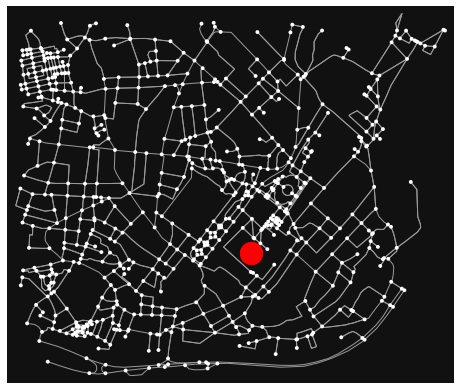

In [ ]:
coords = (41.005385, 28.976825) # Coordinates of Sultan Ahmed Mosque

G = ox.graph_from_point(coords, dist=750, network_type='all') ## Street Network Of Sultan Ahmed Mosque

fig , ax = ox.plot_graph(G,show = False , close = False)
ax.scatter(28.976825,41.005385,color = "red" ,s = 500) ## Mark Sultan Ahmed Mosque
plt.show()

In [ ]:
dist = ox.distance.get_nearest_edge(G, point=coords, return_dist=True)
print(f"Nearest road is {dist[3]*111139} metres away")

Nearest road is 48.466360780728714 metres away


In [ ]:
def findNearestRoad(coords):
  G = ox.graph_from_point(coords, dist=1000, network_type='none',custom_filter='["highway"~"motorway|primary|secondary"]')
  dist = ox.distance.get_nearest_edge(G, point=coords, return_dist=True)
  return dist[3]*111139

In [ ]:
all_data["nearestRoad"] = 0
for i in range(all_data.shape[0]):
  lat, lon = all_data["lat"][i],all_data["lon"][i]
  try:
    distance = findNearestRoad((lat,lon))
    all_data["nearestRoad"][i] = distance
  except:
    all_data["nearestRoad"][i] = np.nan